In [ ]:
import pandas as pd

df = pd.read_csv('/content/Punjab 2022-09-01 to 2025-04-26.csv')
df = df.set_index("datetime")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2022-09-01 to 2025-04-26
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              969 non-null    object 
 1   tempmax           969 non-null    float64
 2   tempmin           969 non-null    float64
 3   temp              969 non-null    float64
 4   feelslikemax      969 non-null    float64
 5   feelslikemin      969 non-null    float64
 6   feelslike         969 non-null    float64
 7   dew               969 non-null    float64
 8   humidity          969 non-null    float64
 9   precip            969 non-null    float64
 10  precipprob        969 non-null    float64
 11  precipcover       969 non-null    float64
 12  preciptype        413 non-null    object 
 13  snow              968 non-null    float64
 14  snowdepth         968 non-null    float64
 15  windgust          968 non-null    float64
 16  windspeed         969 non-null   

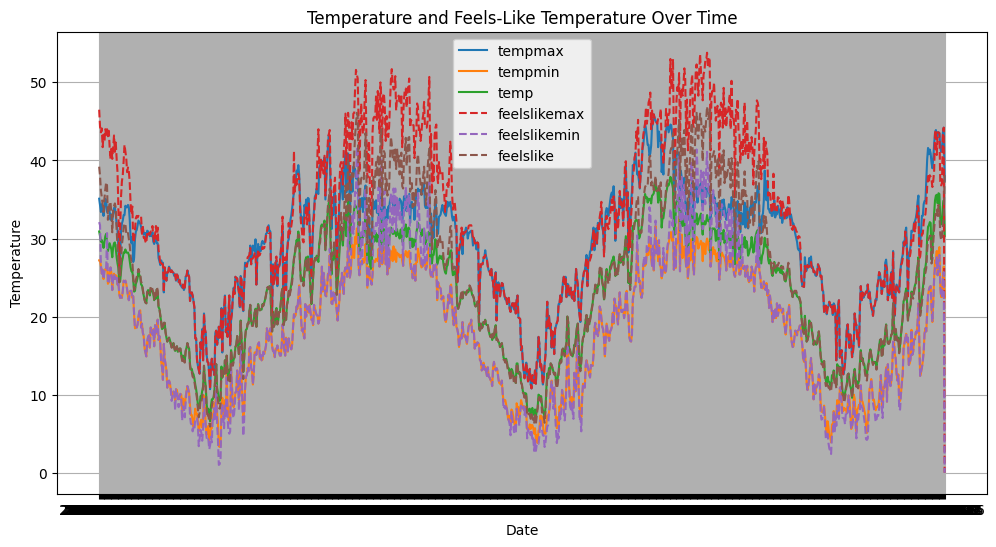

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['tempmax'], label='tempmax', linestyle='-')
plt.plot(df.index, df['tempmin'], label='tempmin', linestyle='-')
plt.plot(df.index, df['temp'], label='temp', linestyle='-')
plt.plot(df.index, df['feelslikemax'], label='feelslikemax', linestyle='--')
plt.plot(df.index, df['feelslikemin'], label='feelslikemin', linestyle='--')
plt.plot(df.index, df['feelslike'], label='feelslike', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature and Feels-Like Temperature Over Time')
plt.legend()
plt.grid(True)

plt.show()

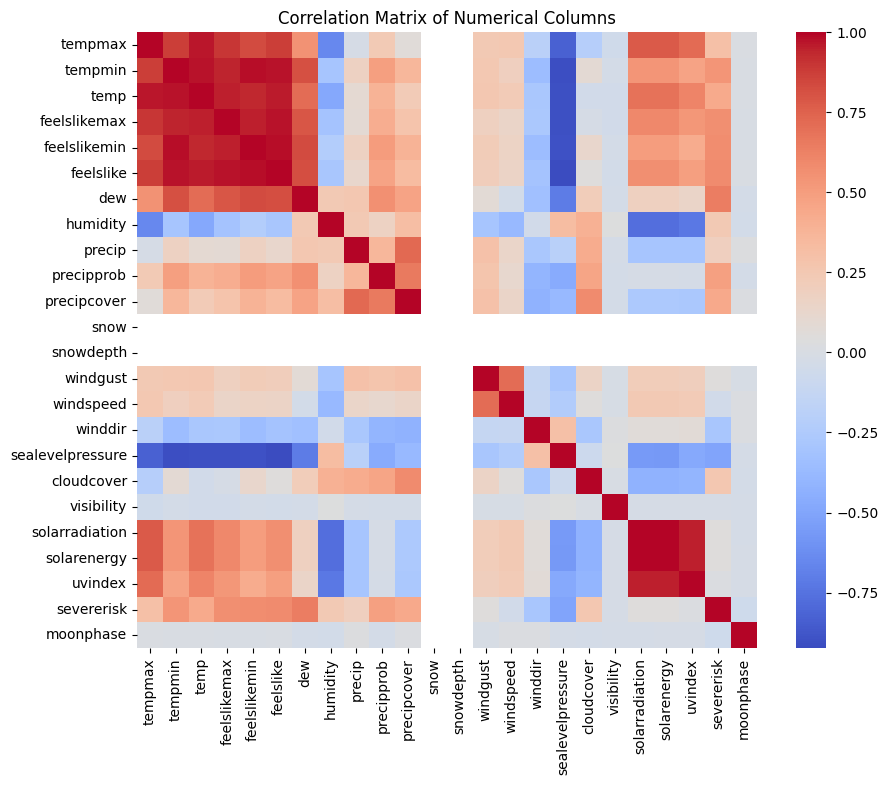

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
numerical_cols = df.select_dtypes(include=['number']).columns  # Select numerical columns
correlation_matrix = df[numerical_cols].corr()  # Calculate correlation

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

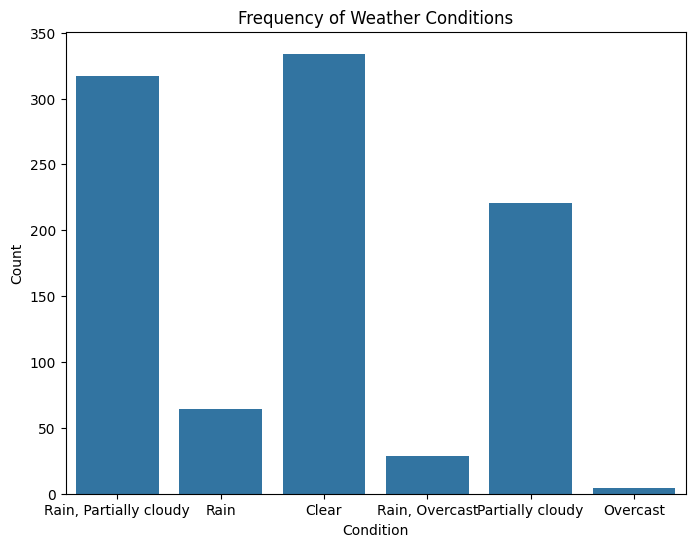

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and has a 'conditions' column
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='conditions', data=df)
plt.title('Frequency of Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

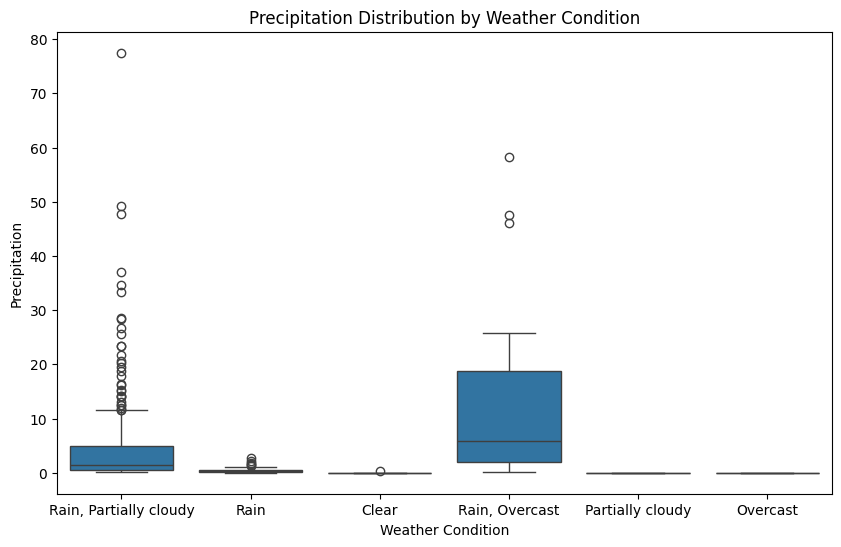

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'precip' and 'conditions' columns
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='conditions', y='precip', data=df)
plt.title('Precipitation Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Precipitation')
plt.show()

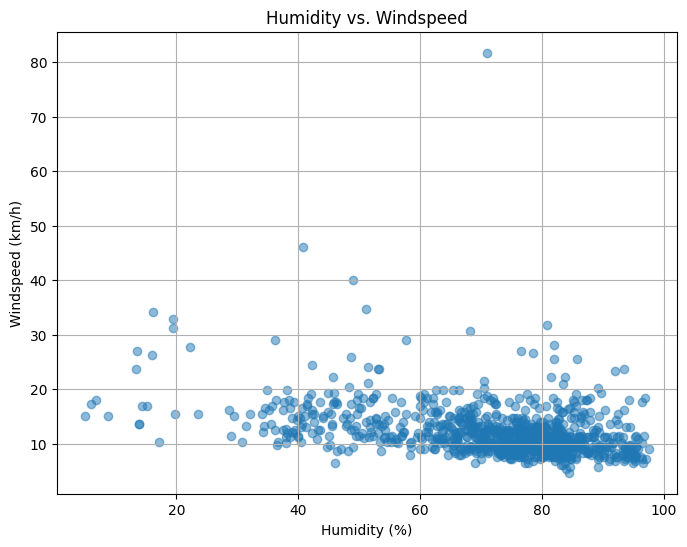

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'humidity' and 'windspeed' columns
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['humidity'], df['windspeed'], alpha=0.5)  # alpha for transparency

plt.xlabel('Humidity (%)')
plt.ylabel('Windspeed (km/h)')  # Adjust units if needed
plt.title('Humidity vs. Windspeed')
plt.grid(True)
plt.show()

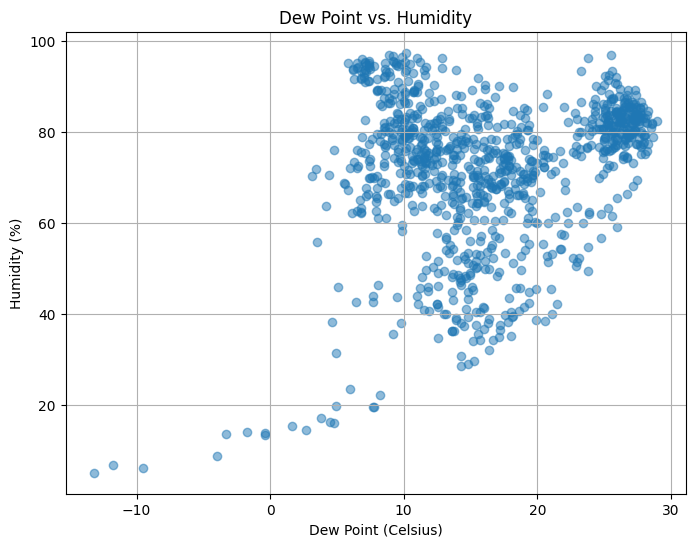

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'dew' and 'humidity' columns
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['dew'], df['humidity'], alpha=0.5)  # alpha for transparency

plt.xlabel('Dew Point (Celsius)')  # Adjust units if needed
plt.ylabel('Humidity (%)')
plt.title('Dew Point vs. Humidity')
plt.grid(True)
plt.show()

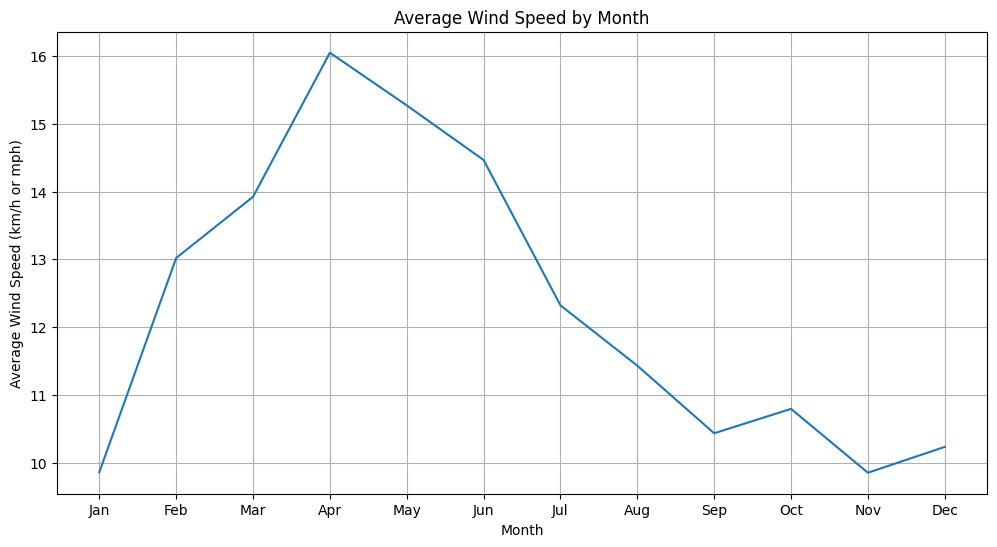

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for datetime handling

# Assuming your DataFrame has 'windspeed' and 'datetime' as index
plt.figure(figsize=(12, 6))

# Extract month from the datetime index
df['month'] = pd.to_datetime(df.index).month

# Group by month and calculate average windspeed
monthly_avg_windspeed = df.groupby('month')['windspeed'].mean()

# Plot the monthly average windspeed
plt.plot(monthly_avg_windspeed.index, monthly_avg_windspeed.values)

plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h or mph)')  # Adjust units if needed
plt.title('Average Wind Speed by Month')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels to month names
plt.show()

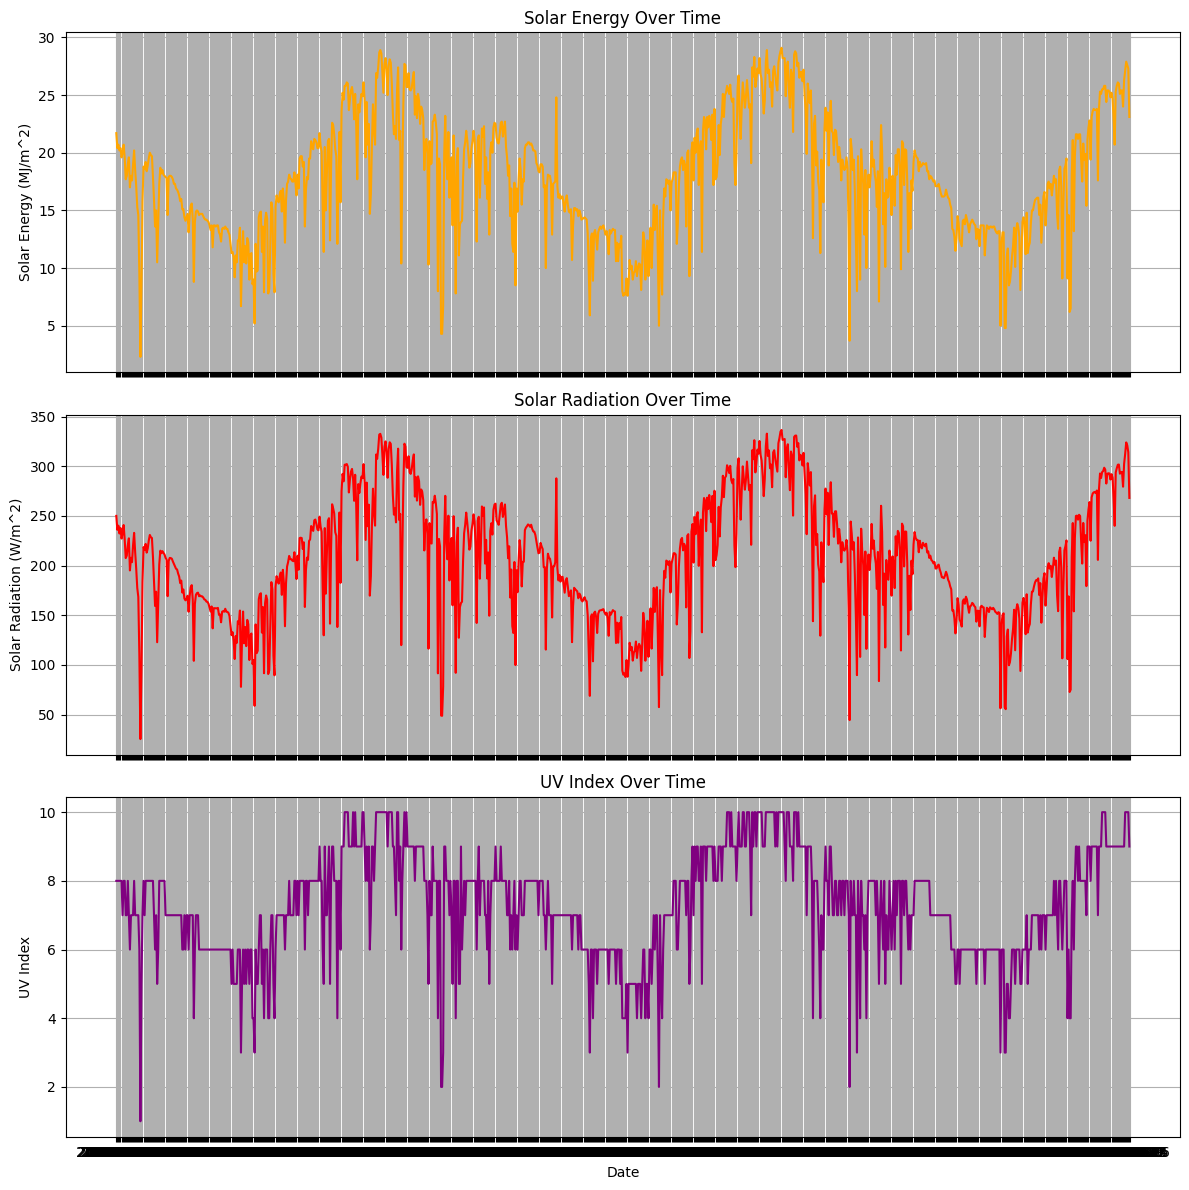

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'solarenergy', 'solarradiation', and 'uvindex'

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)  # Create 3 subplots, sharing x-axis

# Plot solarenergy
axes[0].plot(df.index, df['solarenergy'], label='Solar Energy', color='orange')
axes[0].set_ylabel('Solar Energy (MJ/m^2)')  # Adjust units if needed
axes[0].set_title('Solar Energy Over Time')
axes[0].grid(True)

# Plot solarradiation
axes[1].plot(df.index, df['solarradiation'], label='Solar Radiation', color='red')
axes[1].set_ylabel('Solar Radiation (W/m^2)')  # Adjust units if needed
axes[1].set_title('Solar Radiation Over Time')
axes[1].grid(True)

# Plot uvindex
axes[2].plot(df.index, df['uvindex'], label='UV Index', color='purple')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('UV Index')
axes[2].set_title('UV Index Over Time')
axes[2].grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df
encoded_df = pd.get_dummies(df, columns=['conditions'], prefix=['conditions'])

In [ ]:
# Assuming 'features_cols' is a list of your feature column names
# and 'target_col' is the name of your target column
# Create a boolean mask indicating rows without NaN values in X

features_cols = ['cloudcover','winddir','sealevelpressure','windgust','humidity', 'windspeed', 'precip', 'uvindex','dew']

X = encoded_df[features_cols]
y = df['temp']

mask = X.notna().all(axis=1)

# Apply the mask to both X and y
X = X[mask]
y = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your features in X and target in y

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Define the cross-validation strategy (e.g., KFold with 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits and random_state as needed

# Perform cross-validation and get the scores
scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive MSE
mse_scores = -scores

# Print the results
print("Cross-validation MSE scores:", mse_scores)
print("Average MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Cross-validation MSE scores: [1.07533285 1.23340293 0.67186958 1.49149671 1.10787248]
Average MSE: 1.1159949105015774
Standard Deviation of MSE: 0.2659898227764466


In [ ]:
rf_regressor.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.0392989845360867
R-squared: 0.9813659385274562


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(max_depth=20, n_estimators=50)

In [ ]:
best_y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, best_y_pred)
r2 = r2_score(y_test, best_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.1440347812142058
R-squared: 0.9794880830665014


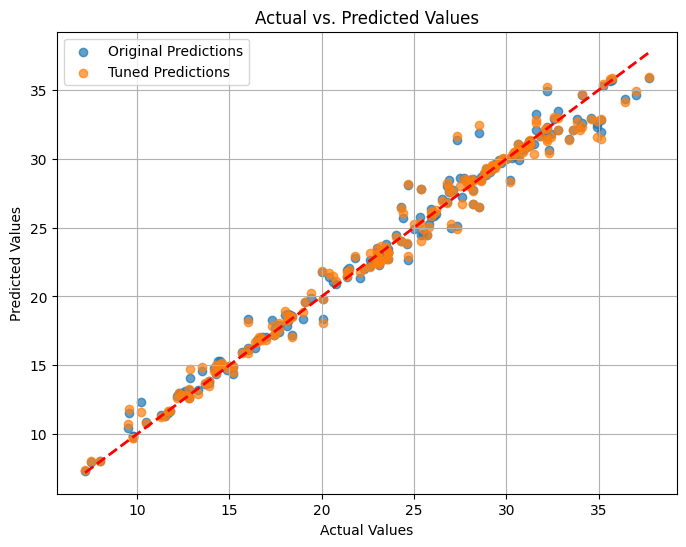

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the actual values and 'y_pred' contains the predicted values
plt.figure(figsize=(8, 6))
# Scatter plot for original predictions
plt.scatter(y_test, y_pred, alpha=0.7, label='Original Predictions')

# Scatter plot for predictions from tuned model
plt.scatter(y_test, best_y_pred, alpha=0.7, label='Tuned Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

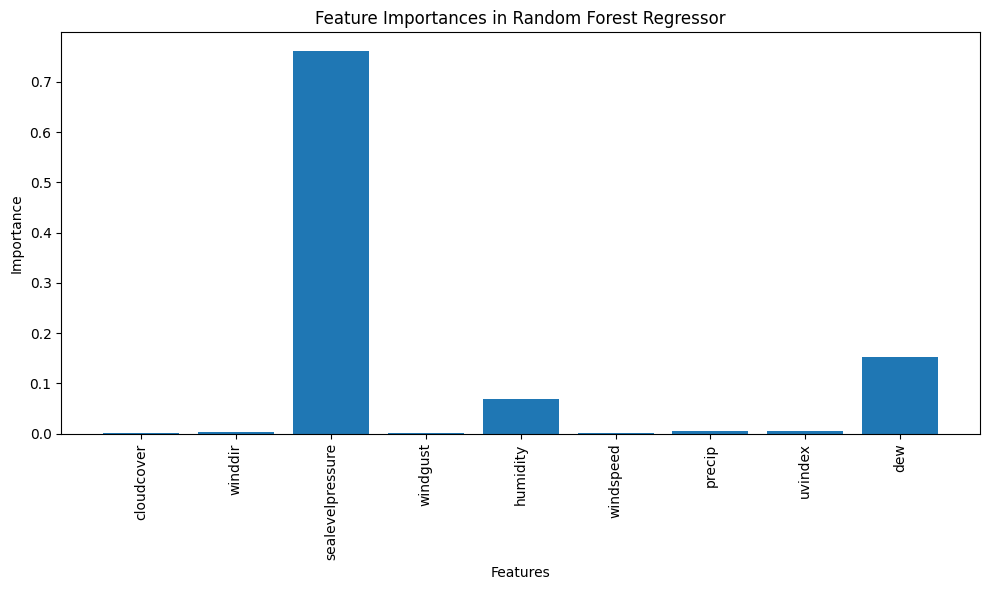

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features_cols' is a list of your feature column names
feature_names = features_cols  # Replace with your actual feature names
importances = best_rf_regressor.feature_importances_
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Regressor')
plt.tight_layout()
plt.show()

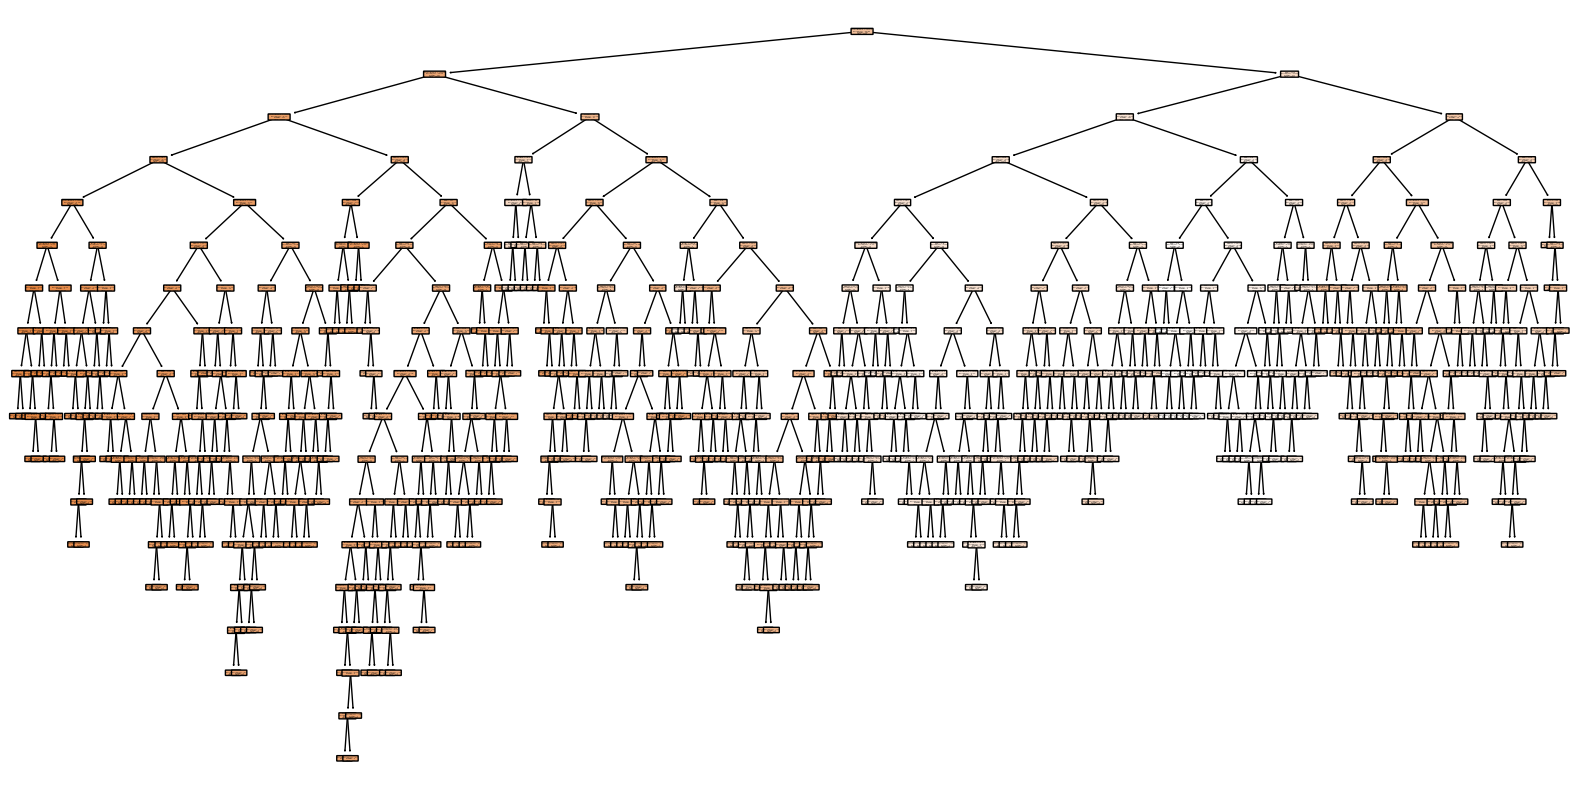

In [ ]:
from sklearn.tree import plot_tree

# Visualize the first tree in the forest (index 0)
plt.figure(figsize=(20, 10))
plot_tree(best_rf_regressor.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.show()

In [ ]:
encoded_df[encoded_df['conditions_Overcast']==True]

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,description,icon,stations,month,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
2023-11-26,Punjab,24.4,13.5,17.8,24.4,13.5,17.8,13.7,79.0,0.0,...,Cloudy skies throughout the day.,cloudy,"42077099999,42099099999,remote",11,False,True,False,False,False,False
2024-01-12,Punjab,11.5,5.0,7.4,11.5,2.8,6.3,6.5,94.2,0.0,...,Cloudy skies throughout the day.,cloudy,"42077099999,42099099999,remote",1,False,True,False,False,False,False
2024-03-26,Punjab,31.4,18.1,24.0,30.9,18.1,24.2,17.3,68.6,0.0,...,Cloudy skies throughout the day.,cloudy,"42077099999,42099099999,remote",3,False,True,False,False,False,False
2025-01-02,Punjab,14.1,8.1,10.2,14.1,6.2,9.5,9.4,95.3,0.0,...,Cloudy skies throughout the day.,cloudy,"42077099999,42099099999,remote",1,False,True,False,False,False,False


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Assuming you have your features in X and a categorical target variable in y
# Select the feature columns from the DataFrame
x = encoded_df[['dew','feelslike','temp','cloudcover','winddir','sealevelpressure','windgust','humidity', 'windspeed', 'precip']]
# Select the target columns (encoded 'conditions') from the DataFrame
y = encoded_df[encoded_df.columns[encoded_df.columns.str.startswith('conditions_')]]
y = y.drop('conditions_Overcast', axis=1) #4 rows of data only
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report with precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred,target_names=["conditions_Clear","conditions_Partially cloudy","conditions_Rain","conditions_Rain, Overcast","conditions_Rain, Partially cloudy"]))

# (Optional) Perform cross-validation for more robust evaluation
cv_scores = cross_val_score(rf_classifier, x, y, cv=5, scoring='accuracy')  # Use appropriate scoring metric
print("Cross-validation accuracy scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())
print("Standard Deviation of accuracy:", cv_scores.std())

Accuracy: 0.9742268041237113
                                   precision    recall  f1-score   support

                 conditions_Clear       0.98      1.00      0.99        62
      conditions_Partially cloudy       0.97      1.00      0.99        37
                  conditions_Rain       1.00      0.92      0.96        12
        conditions_Rain, Overcast       1.00      0.75      0.86        12
conditions_Rain, Partially cloudy       0.97      1.00      0.99        70

                        micro avg       0.98      0.98      0.98       193
                        macro avg       0.99      0.93      0.96       193
                     weighted avg       0.98      0.98      0.98       193
                      samples avg       0.97      0.97      0.97       193

Cross-validation accuracy scores: [1.         1.         0.97938144 1.         0.97409326]
Average accuracy: 0.9906949415095347
Standard Deviation of accuracy: 0.011518361603684564


In [ ]:
import joblib

# Save the RandomForestRegressor model
joblib.dump(best_rf_regressor, 'rf_regressor_model.pkl')

# Save the RandomForestClassifier model
joblib.dump(rf_classifier, 'rf_classifier_model.pkl')

['rf_classifier_model.pkl']